In [8]:
import performance_functions
from CKA_functions import fix_dataset_shape,load_dataset
from torch.utils.data import DataLoader
from torch import argmax
import torch
import importlib
importlib.reload(performance_functions)
from performance_functions import *

In [7]:
data_path = "../Datasets/"
X = torch.load('../Datasets/emotion_test_set.pt')
test_loader = DataLoader(X, batch_size=16)


C:\Users\ahmm9\AppData\Local\Temp\ipykernel_18848\1679558783.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X = torch.load('../Datasets/emotion_test_set.pt')


In [14]:
from CKA_functions import load_model
model_path = "../models/SGCN/ShallowSGCNNet_56_47456655.pth" 
model = load_model("ShallowRNNNet_60_99999.pth","../models/ShallowRNN/")
model

ShallowRNNNet(
  (RNN): RNN(32, 32, num_layers=4, batch_first=True)
  (spatial): Conv2d(1, 40, kernel_size=(32, 1), stride=(1, 1))
  (batch_norm): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=(1, 20), stride=(1, 20), padding=0)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=800, out_features=3, bias=True)
)

In [15]:
all_preds,all_truths = get_labels(model,dataloader=test_loader)
print(len(all_preds))
print(all_preds)
print(len(all_truths))
print(all_truths)

not enough values to unpack (expected 3, got 2)
trying to 2 outputs only
22337
tensor([2, 2, 2,  ..., 0, 2, 0])
22337
tensor([1, 1, 1,  ..., 1, 1, 2])


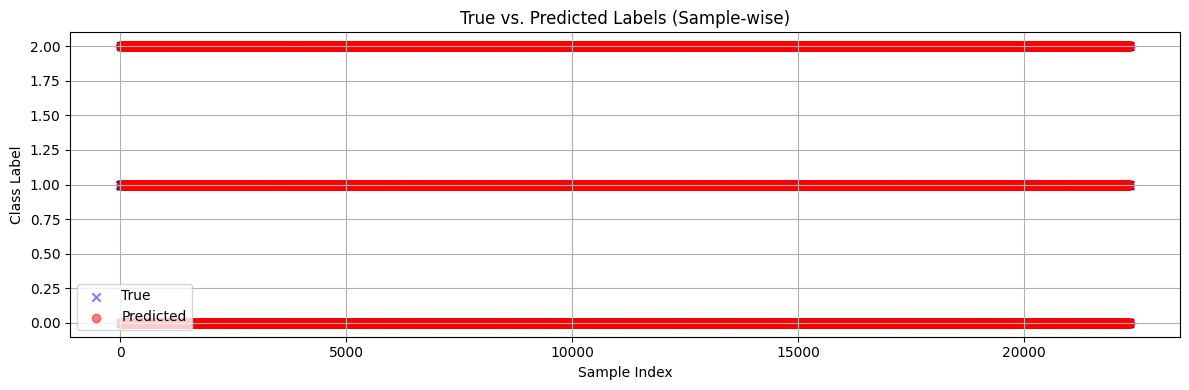

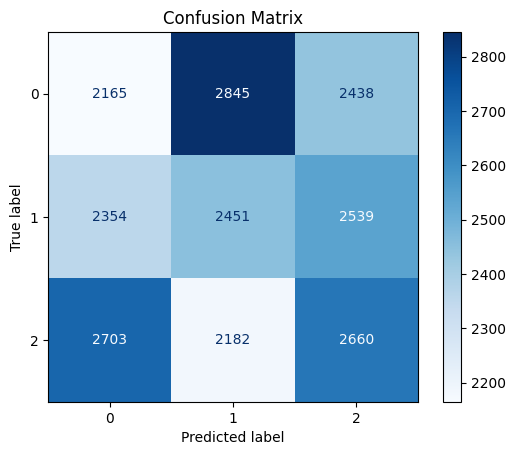

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = all_preds.cpu().numpy()
truths = all_truths.cpu().numpy()
plt.figure(figsize=(12, 4))
plt.scatter(range(len(truths)), truths, label='True', marker='x', alpha=0.5, color='blue')
plt.scatter(range(len(preds)), preds, label='Predicted', marker='o', alpha=0.5, color='red')
plt.title('True vs. Predicted Labels (Sample-wise)')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# --- Confusion matrix ---
cm = confusion_matrix(truths, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [16]:
acc = compute_accuracy(all_preds,all_truths)
print(acc)

0.3257375654743251


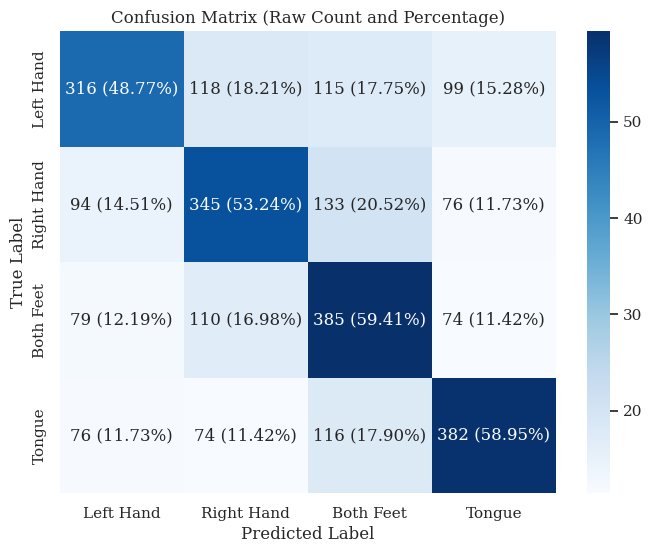

In [ ]:
compute_class_confusions(all_preds,all_truths)

In [ ]:
compute_all_model_confusion("../models","all_model_conf") 

Classification report saved to: all_model_conf\ShallowLSTMNet_report.txt
Classification report saved to: all_model_conf\ShallowRNNNet_report.txt
Classification report saved to: all_model_conf\ShallowSGCNNet_report.txt
Classification report saved to: all_model_conf\ShallowFBCSPNet_report.txt
Classification report saved to: all_model_conf\ShallowAttentionNet_report.txt
{'LSTM': 0.5813782964877546, 'RNN': 0.5685966280326762, 'SGCN': 0.5387619178843261, 'shallow': 0.5944016740784968, 'SpatAttention': 0.4918252655753135}

Summary Table of Metrics:
        Class   TP   FP   FN    TN    Chi2  p-value
0   Left Hand  272  375  243  1696  263.00      0.0
1  Right Hand  425  221  324  1616  565.20      0.0
2   Both Feet  461  186  300  1639  724.13      0.0
3      Tongue  358  288  203  1737  573.87      0.0

Summary Table of Metrics:
        Class   TP   FP   FN    TN    Chi2  p-value
0   Left Hand  273  373  267  1671  236.06      0.0
1  Right Hand  396  250  294  1644  524.41      0.0
2   Both